In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

In [ ]:
def create_ground_truth(timestamp):
  if (timestamp > pd.to_datetime('2022-02-28 13:22:00')) & (timestamp < pd.to_datetime('2022-02-28 13:22:21')):
    return 1
  if (timestamp > pd.to_datetime('2022-02-28 13:22:32')) & (timestamp < pd.to_datetime('2022-02-28 13:22:50')):
    return 2
  if (timestamp > pd.to_datetime('2022-02-28 13:23:02')) & (timestamp < pd.to_datetime('2022-02-28 13:23:20')):
    return 3
  if (timestamp > pd.to_datetime('2022-02-28 13:23:31')) & (timestamp < pd.to_datetime('2022-02-28 13:23:51')):
    return 4
  if (timestamp > pd.to_datetime('2022-02-28 13:24:04')) & (timestamp < pd.to_datetime('2022-02-28 13:24:20')):
    return 5
  if (timestamp > pd.to_datetime('2022-02-28 13:24:33')) & (timestamp < pd.to_datetime('2022-02-28 13:24:51')):
    return 6
  if (timestamp > pd.to_datetime('2022-02-28 13:24:56')) & (timestamp < pd.to_datetime('2022-02-28 13:25:16')):
    return 7
  if (timestamp > pd.to_datetime('2022-02-28 13:25:20')) & (timestamp < pd.to_datetime('2022-02-28 13:25:43')):
    return 8
  if (timestamp > pd.to_datetime('2022-02-28 13:26:00')) & (timestamp < pd.to_datetime('2022-02-28 13:26:18')):
    return 9
  if (timestamp > pd.to_datetime('2022-02-28 13:26:33')) & (timestamp < pd.to_datetime('2022-02-28 13:26:51')):
    return 10
  if (timestamp > pd.to_datetime('2022-02-28 13:27:04')) & (timestamp < pd.to_datetime('2022-02-28 13:27:22')):
    return 11
  if (timestamp > pd.to_datetime('2022-02-28 13:27:33')) & (timestamp < pd.to_datetime('2022-02-28 13:27:51')):
    return 12
  if (timestamp > pd.to_datetime('2022-02-28 13:28:03')) & (timestamp < pd.to_datetime('2022-02-28 13:28:21')):
    return 13
  if (timestamp > pd.to_datetime('2022-02-28 13:28:34')) & (timestamp < pd.to_datetime('2022-02-28 13:28:52')):
    return 14

In [ ]:
fp_sniff_1 = pd.read_csv('fp_sniff_1.csv')
fp_sniff_2 = pd.read_csv('fp_sniff_2.csv')
fp_sniff_3 = pd.read_csv('fp_sniff_3.csv')

#fp_sniff_1.dropna()
#fp_sniff_2.dropna()
#fp_sniff_3.dropna()

fp_sniff_1 = fp_sniff_1.loc[(fp_sniff_1['wlan.sa'] == 'e0:dc:ff:32:e7:2f') & (fp_sniff_1['frame.len'] > 100)]
fp_sniff_1 = fp_sniff_1.drop(['frame.number','wlan.sa','frame.len'],axis=1)
fp_sniff_1 = fp_sniff_1.rename(columns = {'wlan.seq': 'sn_1', 'frame.time' : 'time_1', 'wlan_radio.signal_dbm' : 'rss_1'})
fp_sniff_1['time_1'] = pd.to_datetime(fp_sniff_1['time_1'])

fp_sniff_2 = fp_sniff_2.loc[(fp_sniff_2['wlan.sa'] == 'e0:dc:ff:32:e7:2f') & (fp_sniff_2['frame.len'] > 100)]
fp_sniff_2 = fp_sniff_2.drop(['frame.number','wlan.sa','frame.len'],axis=1)
fp_sniff_2 = fp_sniff_2.rename(columns = {'wlan.seq': 'sn_2', 'frame.time' : 'time_2', 'wlan_radio.signal_dbm' : 'rss_2'})
fp_sniff_2['time_2'] = pd.to_datetime(fp_sniff_2['time_2'])

fp_sniff_3 = fp_sniff_3.loc[(fp_sniff_3['wlan.sa'] == 'e0:dc:ff:32:e7:2f') & (fp_sniff_3['frame.len'] > 100)]
fp_sniff_3 = fp_sniff_3.drop(['frame.number','wlan.sa','frame.len'],axis=1)
fp_sniff_3 = fp_sniff_3.rename(columns = {'wlan.seq': 'sn_3', 'frame.time' : 'time_3', 'wlan_radio.signal_dbm' : 'rss_3'})
fp_sniff_3['time_3'] = pd.to_datetime(fp_sniff_3['time_3'])

fp_join = fp_sniff_1.set_index('sn_1').join(fp_sniff_2.set_index('sn_2'), how = 'outer')
fp_join = fp_join.join(fp_sniff_3.set_index('sn_3'))

#take the maximum timestamp
fp_join['time'] = fp_join[['time_1','time_2','time_3']].max(axis=1)
fp_join['time'] = fp_join[['time_1','time_2','time_3']].max(axis=1)
fp_join = fp_join.drop(['time_1', 'time_2', 'time_3'], axis=1)
fp_join = fp_join.fillna(-100)
fp_join = fp_join.drop_duplicates()

#add ground truth
fp_join['gt'] = fp_join['time'].apply(create_ground_truth)
fp_join = fp_join.dropna()
fp_join.to_csv('test.csv')


/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


0.6213592233009708
0.6116504854368932
0.6456310679611651
0.6407766990291263
0.6504854368932039
0.6456310679611651
0.6359223300970874
0.6262135922330098
0.6067961165048543


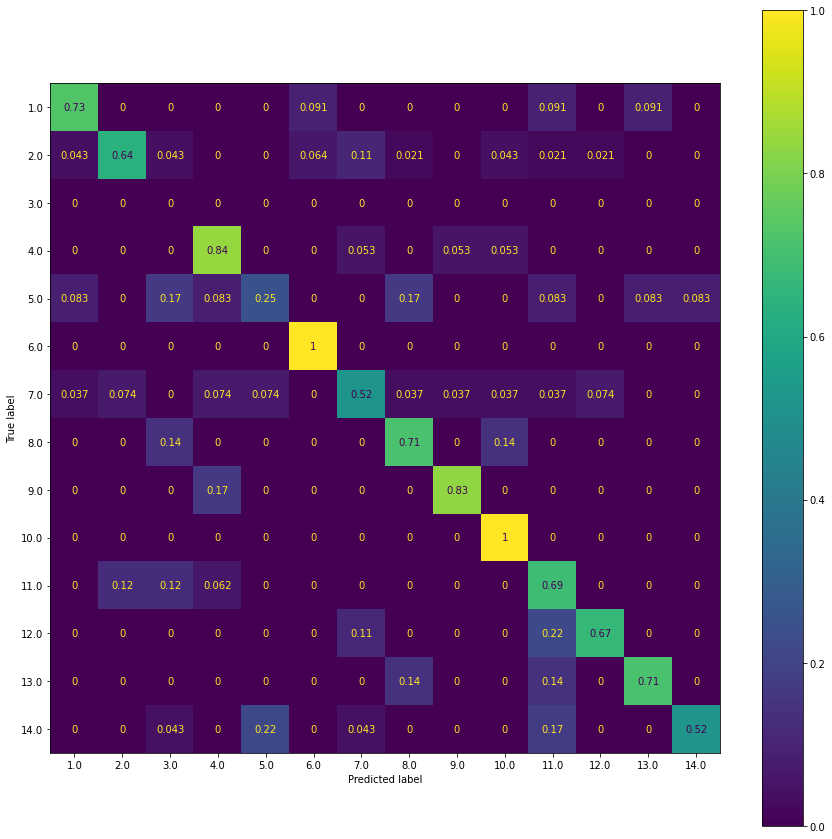

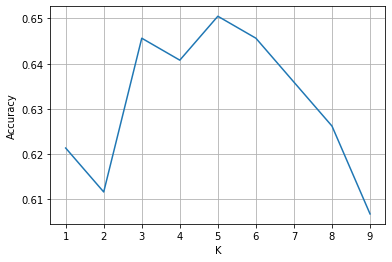

In [ ]:
scaler = StandardScaler()

X = fp_join.drop(['time'],axis=1).dropna()
Y = X['gt']
X = X.drop('gt',axis=1)

X_norm = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.5)

ACCURACY = []
for k in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
  knn.fit(X_train, y_train)
  knn_predict = knn.predict(X_test)
  accuracy = accuracy_score(y_test, knn_predict)
  ACCURACY.append(accuracy)
  print(accuracy)

bestk = np.argmax(ACCURACY)+1
knn = KNeighborsClassifier(n_neighbors=bestk, weights='distance')
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
fig, ax = plt.subplots(figsize=(15, 15))
ConfusionMatrixDisplay.from_predictions(knn_predict, y_test, ax=ax, normalize='true')

fig = plt.figure()
plt.plot(range(1,10),ACCURACY)
plt.grid(visible=True)
plt.xlabel('K')
plt.ylabel('Accuracy')


In [ ]:
test_sniff_1 = pd.read_csv('test_sniff_1.csv')
test_sniff_2 = pd.read_csv('test_sniff_2.csv')
test_sniff_3 = pd.read_csv('test_sniff_3.csv')

#localizing RPI3
test_sniff_1 = test_sniff_1.loc[(test_sniff_1['wlan.sa'] == 'a0:9f:10:7f:b3:68')]
test_sniff_2 = test_sniff_2.loc[(test_sniff_2['wlan.sa'] == 'a0:9f:10:7f:b3:68')]
test_sniff_3 = test_sniff_3.loc[(test_sniff_3['wlan.sa'] == 'a0:9f:10:7f:b3:68')]

test_sniff_1 = test_sniff_1.drop(['frame.number','wlan.sa','frame.len'],axis=1)
test_sniff_1 = test_sniff_1.rename(columns = {'wlan.seq': 'sn_1', 'frame.time' : 'time_1', 'wlan_radio.signal_dbm' : 'rss_1'})
test_sniff_1['time_1'] = pd.to_datetime(test_sniff_1['time_1'])

test_sniff_2 = test_sniff_2.drop(['frame.number','wlan.sa','frame.len'],axis=1)
test_sniff_2 = test_sniff_2.rename(columns = {'wlan.seq': 'sn_2', 'frame.time' : 'time_2', 'wlan_radio.signal_dbm' : 'rss_2'})
test_sniff_2['time_2'] = pd.to_datetime(test_sniff_2['time_2'])

test_sniff_3 = test_sniff_3.drop(['frame.number','wlan.sa','frame.len'],axis=1)
test_sniff_3 = test_sniff_3.rename(columns = {'wlan.seq': 'sn_3', 'frame.time' : 'time_3', 'wlan_radio.signal_dbm' : 'rss_3'})
test_sniff_3['time_3'] = pd.to_datetime(test_sniff_3['time_3'])

test_join = test_sniff_1.set_index('sn_1').join(test_sniff_2.set_index('sn_2'), how = 'outer')
test_join = test_join.join(test_sniff_3.set_index('sn_3'))

#take the maximum timestamp
test_join['time'] = test_join[['time_1','time_2','time_3']].max(axis=1)
test_join['time'] = test_join[['time_1','time_2','time_3']].max(axis=1)
test_join = test_join.drop(['time_1', 'time_2', 'time_3'], axis=1)
test_join = test_join.fillna(-100)
test_join = test_join.drop_duplicates()

test_join = test_join.drop(['time'],axis=1).dropna()
test_norm = scaler.transform(test_join)
knn.fit(X_norm, Y)
knn_predict = knn.predict(test_norm)
print(knn_predict)

[ 9.  9.  5. 12. 12. 12. 12. 12. 12. 12. 12. 12.  7. 12. 12. 12. 12. 12.
 12. 12. 12. 12. 12.]


/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
